In [1]:
import sys
sys.path.append('..')
from gridworld_agent import *
import csv
import numpy as np
%matplotlib inline
def writeLikelihoodToFile(data, filename):
    with open(filename, 'w+') as f:
        for val in data:
            coordlist, likelihood = val
            coords = np.array2string(coordlist).replace('\n', '')
            f.write(str(likelihood) + ',')
            f.write(coords)
            f.write('\n')

In [2]:
# First, we find a good softmax value
possibilities = [0.001, 0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.5]
for val in possibilities:
    # put reward in upper left corner
    a = GridWorldAgent(softmax=val,width=10, rewardValues={9:10})
    a.Run()
    # check policy for state directly to the left of the reward. The correct action is right - action[1]
    prob_correct_choice_r = a.mdp.policy[1,8]
    # repeat, checking the state two away - correct action is right - action[1]
    prob_correct_choice_farther = a.mdp.policy[1,7]
    print(val, prob_correct_choice_r, prob_correct_choice_farther)
    
# Based on this, we select a softmax value of 0.2
a = GridWorldAgent(softmax=0.2,width=10, rewardValues={9:10})

(0.001, 0.25, 0.25)
(0.01, 1.0, 1.0)
(0.05, 0.999954595335379, 0.9999251357564344)
(0.1, 0.9931921284761197, 0.9912359568849934)
(0.2, 0.9112819730480288, 0.8988766987982838)
(0.25, 0.8504709566192, 0.8341890347422248)
(0.3, 0.7896249481936108, 0.7712946583418625)
(0.5, 0.6051702413311559, 0.5880864901903523)


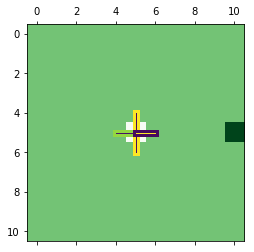

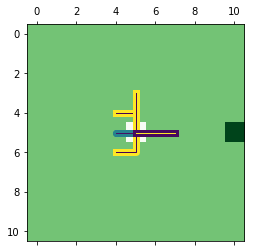

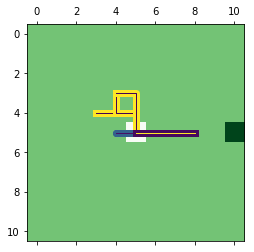

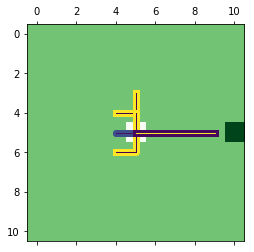

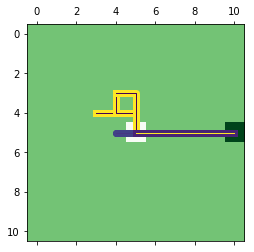

In [3]:
# Next, we create a map with the reward at the middle right, and display and write data
a = GridWorldAgent(softmax=0.25,width=11, rewardValues={(10,5):10})
lengths = [1,2,3,4,5]
for length in lengths:
    data = a.getLikelihoodAllPaths(length, display=True, topthree=True)
    writeLikelihoodToFile(data, '11width_one_reward_len_'+str(length)+'.csv')
# a.displayAllPaths(2, topthree=False)
# # # len(data)
# coord = data[0][0]
# print(len(coord))
# print(len(np.unique(coord,axis=0)))

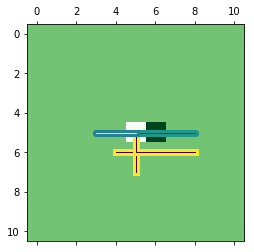

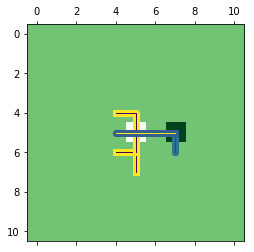

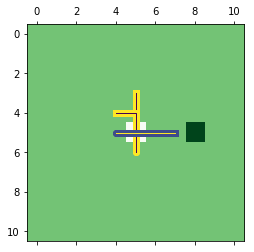

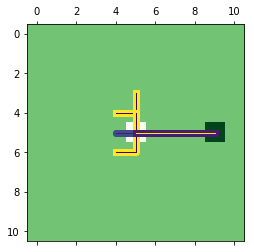

In [4]:
# example of how the paths change as the goal gets further away from the starting point
reward = [(6,5),(7,5),(8,5),(9,5)]
for r in reward:
    a = GridWorldAgent(softmax=0.2,width=11, rewardValues={r:10})
    a.getLikelihoodAllPaths(4, display=True, topthree=True)

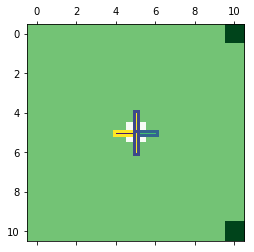

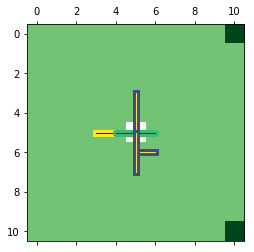

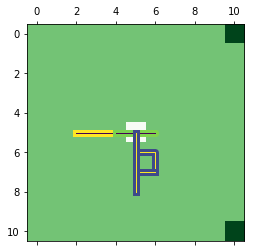

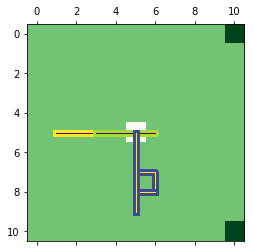

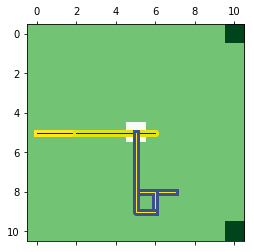

In [6]:
# Next, we create a map with the reward at the middle right, and display and write data
a = GridWorldAgent(softmax=0.25,width=11, rewardValues={(10,0):10, (10,10):10})
lengths = [1,2,3,4,5]
for length in lengths:
    data = a.getLikelihoodAllPaths(length, display=True, topthree=True)
    writeLikelihoodToFile(data, '11width_two_reward_len_'+str(length)+'.csv')


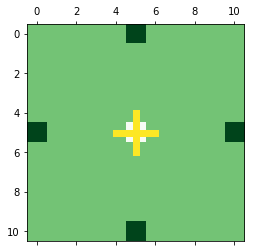

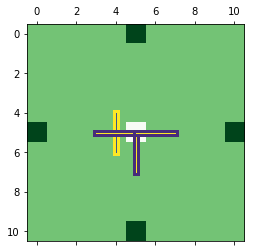

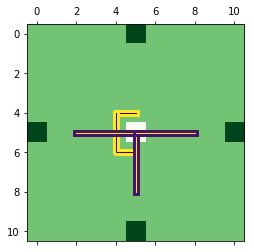

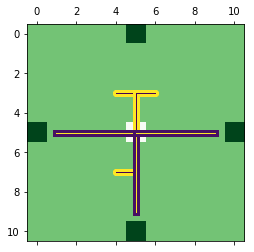

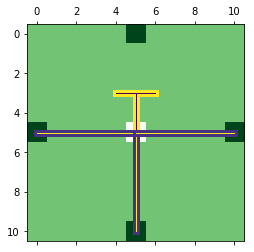

In [9]:
# Next, we create a map with reward on all four sides
a = GridWorldAgent(softmax=0.25,width=11, rewardValues={(5,0):10, (0,5):10, (5,10):10, (10,5):10})
lengths = [1,2,3,4,5]
for length in lengths:
    data = a.getLikelihoodAllPaths(length, display=True, topthree=True)
    writeLikelihoodToFile(data, '11width_four_reward_len_'+str(length)+'.csv')

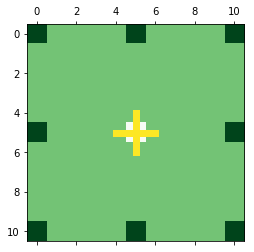

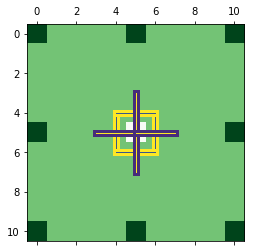

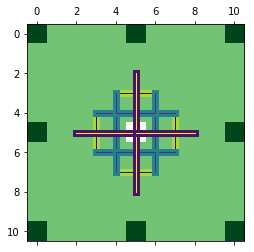

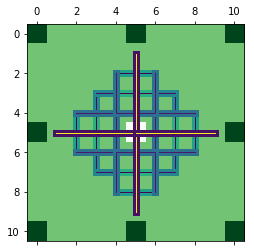

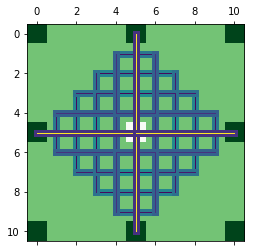

In [10]:
# Next, we create a map with 8 values
a = GridWorldAgent(softmax=0.25,width=11, rewardValues={(0,0):10,(5,0):10,(10,0):10,(0,5):10,(10,5):10,(0,10):10,(5,10):10,(10,10):10})
lengths = [1,2,3,4,5]
for length in lengths:
    data = a.getLikelihoodAllPaths(length, display=True, topthree=False)
    writeLikelihoodToFile(data, '11width_eight_reward_len_'+str(length)+'.csv')

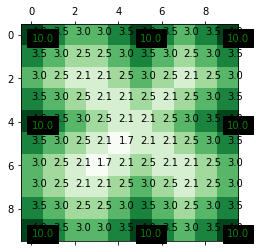

array([0.96446568, 0.01184477, 0.01184477, 0.01184477])

In [16]:
a = GridWorldAgent(softmax=0.2,width=10, rewardValues={0:10, 9:10, 90:10, 99:10, 5:10, 49:10, 40:10, 95:10})
a.Run()
a.Display()
a.mdp.policy[:,43]
# a.mdp.policy[:,42]